# Multi-class classification - Phyla Challenge 2: Classification of Diseases based on the Gut Microbiome

In [24]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import  lightgbm as lgbm 
import xgboost as xgb 
import catboost as cat 

In [2]:
# Load data
df = pd.read_csv('challenge_1_gut_microbiome_data.csv')

## Data Overview

In [3]:
df.head()

,Samples,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
1,Sample-2,0,0,0,0,0,0,0,0,0,...,0,17111,0,0,0,0,0,0,0,Disease-2
2,Sample-3,0,10,0,0,0,0,0,0,0,...,0,214,0,0,0,0,0,0,0,Disease-2
3,Sample-4,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
4,Sample-5,0,8,0,0,0,0,0,0,0,...,0,1932,0,0,0,0,0,3,0,Disease-2


In [4]:
# drop first column
df.drop('Samples', axis=1, inplace=True)

In [5]:
# check data
df.describe()

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,...,Bacteria-1085,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.00000,7481.000000,7481.000000,...,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,0.032750,37.562893,2.537495,0.000401,0.000936,0.000668,0.454618,0.04478,0.007218,0.050394,...,0.000535,0.007085,626.869937,0.012699,0.001871,0.005213,0.053068,0.000267,37.886379,0.562224
std,2.719433,404.702666,55.417197,0.034685,0.080932,0.057808,13.035579,1.67340,0.406105,1.022867,...,0.046247,0.612768,2881.775152,1.098358,0.161863,0.450905,3.835730,0.023123,861.540239,18.802489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,235.000000,13253.000000,3881.000000,3.000000,7.000000,5.000000,842.000000,103.00000,32.000000,45.000000,...,4.000000,53.000000,79898.000000,95.000000,14.000000,39.000000,328.000000,2.000000,53963.000000,1256.000000


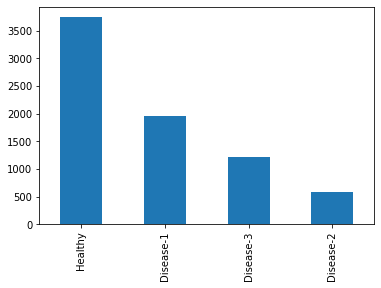

In [6]:
# Check Disease breakdown
pd.value_counts(df['disease']).plot.bar()
# Looks like there is a lot of Healthy in the data compared to the other target values

In [ ]:
# Correlation
#x = df.corr()
#plt.subplots(figsize=(20,20))
#sns.heatmap(x,cmap='RdYlGn',annot=True)
#plt.show();

## Modelling

In [7]:
# rescale all variables except the target variable
df_scale = df.loc[:, df.columns!='disease']
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale)
df_scale.reset_index(drop=True, inplace=True)

In [8]:
# combine rescaled value
df['disease'].reset_index(drop=True, inplace=True)
df = pd.concat([df_scale,df['disease']], axis=1)
df.shape

(7481, 1095)

In [9]:
#Let's now create our training and test data.
train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape, test.shape)

(5984, 1095) (1497, 1095)


In [10]:
#!pip install imblearn
#!pip install -U imbalanced-learn

In [15]:
# Fix Target variable imbalance
X_train = train.drop('disease', axis=1)
y_train = train[['disease']]
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_train, y_train = nr.fit_resample(X_train, y_train)

In [16]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [19]:
# combine train data
train = pd.concat([X_train,y_train], axis=1)
train.reset_index(drop=True, inplace=True)

In [20]:
train.columns = df.columns.values.tolist()

KNN: 0.373132 (0.241913)
CART: 0.445493 (0.106805)
LR: 0.054142 (0.103595)
RF: 0.471989 (0.154755)
GB: 0.522126 (0.165132)
Gauss: 0.607929 (0.180421)
LDA: 0.475738 (0.225873)
Bagging: 0.477471 (0.125077)
Ensemble: 0.460728 (0.153794)


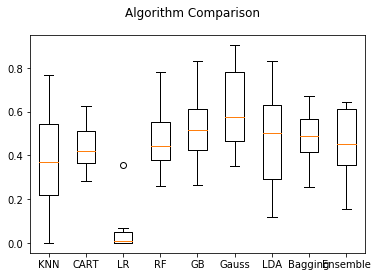

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# perform classification
array = train.values
X = array[:,0:1094]
Y = array[:,1094]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('Gauss',GaussianNB()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('Bagging',BaggingClassifier()))
models.append(('Ensemble',VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                       ('rf', RandomForestClassifier()),
                                                       ('gb',GradientBoostingClassifier()),
                                                       ('kn',KNeighborsClassifier()),
                                                       ('lda',LinearDiscriminantAnalysis()), 
                                                       ('bag',BaggingClassifier())], voting='hard')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Metrics of Scoring
# F1 score

In [ ]:
# Metrics of Scoring
# Cohen’s kappa